# ASSIGNMENT 1: Used Cars Price Prediction and Evaluation

<br>

### Table Of Contents:
1. [Data Cleaning](#clean)
2. [Data Visualisation](#visual)
    * [Companies. Their Models and Mean Selling Price.](#v1) 
    * [Popularity By Make/company](#v2)
    * [Popularity By Segment](#v3)
    * [Popularity By Colour](#v4)
    * [Popularity of Segment in Each Make](#v5)
    * [Fuel Type in Each Make](#v6)
    * [Price Variation](#v7)
    * [Price VS Make ](#v8)
    * [Price VS Segment](#v9)
    * [Price VS Year](#v10)
    * [Price VS Distance travelled by Car](#v11)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_rows',None)
sns.set_theme(style='darkgrid',font='fantasy')

In [3]:
df = pd.read_csv('cars_price.csv',index_col = 'Unnamed: 0')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


The following columns need to be clearly understood:
* make : The brand of the car
* model: Model of the car
* priceUSD: Selling Price of the used car in US Dollars.
* year : Year in which the car was bought/launched.
* mileage(kilometers) : It actually refers to the total distance travelled by the car till now, and not the mileage. The column name is wrongly written.
* fuel_type: Either of petrol, diesel or electric.
* transmission: The type of transmission used by the car.(Automatic/Manual)
* volume(cm3) : Car engine displacement in cc.

In [4]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,7430.383775,2003.485625,2.434332e+05,2103.201676
std,8338.242134,8.114896,3.167033e+05,938.724653
min,95.000000,1938.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,9850.000000,2010.000000,3.087610e+05,2300.000000
max,195000.000000,2019.000000,9.999999e+06,20000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 40000 non-null  object 
 1   model                40000 non-null  object 
 2   priceUSD             40000 non-null  int64  
 3   year                 40000 non-null  int64  
 4   condition            40000 non-null  object 
 5   mileage(kilometers)  40000 non-null  float64
 6   fuel_type            40000 non-null  object 
 7   volume(cm3)          39970 non-null  float64
 8   color                40000 non-null  object 
 9   transmission         40000 non-null  object 
 10  drive_unit           38655 non-null  object 
 11  segment              36245 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.0+ MB


In [6]:
df.nunique()

make                     93
model                   991
priceUSD               2510
year                     72
condition                 3
mileage(kilometers)    6392
fuel_type                 3
volume(cm3)             396
color                    13
transmission              2
drive_unit                4
segment                   9
dtype: int64

In [7]:
print('condition:   ',df.condition.unique())
print('Fuel Type:   ',df.fuel_type.unique())
print('Color:       ',df.color.unique())
print('Transmission:',df.transmission.unique())
print('Drive unit:  ',df.drive_unit.unique())
print('Segment:     ',df.segment.unique())

condition:    ['with mileage' 'with damage' 'for parts']
Fuel Type:    ['petrol' 'diesel' 'electrocar']
Color:        ['black' 'silver' 'purple' 'blue' 'burgundy' 'green' 'gray' 'white'
 'other' 'red' 'brown' 'orange' 'yellow']
Transmission: ['mechanics' 'auto']
Drive unit:   ['front-wheel drive' 'all-wheel drive' 'part-time four-wheel drive'
 'rear drive' nan]
Segment:      ['D' 'M' 'A' 'J' 'C' 'E' nan 'F' 'B' 'S']


In [8]:
df.groupby(['make','model','segment']).first()

priceUSD  year     condition  \
make          model                  segment                                 
acura         mdx                    J           14000  2007  with mileage   
alfa-romeo    145                    C             856  1996  with mileage   
              146                    C            1100  1995  with mileage   
              147                    C            4200  2004  with mileage   
              156                    D            1200  1997  with mileage   
              159                    D            8800  2007  with mileage   
              164                    E            1650  1995  with mileage   
              166                    E            5100  2005  with mileage   
audi          100                    E            3100  1993  with mileage   
              80                     D             500  1982  with mileage   
              90                     D            2000  1986  with mileage   
              a1                     B            8700  2011  with mileage   
              a2                     M            4500  2001  with mileage   
              a3                     C           12200  2013  with mileage   
              a4                     D           13000  2013  with mileage   
              a4-allroad             D           13000  2010  with mileage   
              a5                     D            9800  2012  with mileage   
              a6                     E           17500  2013  with mileage   
              a6-allroad             E           10050  2008  with mileage   
              a7                     S           23450  2012  with mileage   
              a8                     F            8000  2005  with mileage   
              q3                     J           16500  2011  with mileage   
              q5                     J           15250  2009  with mileage   
              q7                     J           10999  2007  with mileage   
              s5                     J           16000  2008  with mileage   
              s6                     J           33000  2013  with mileage   
              s7                     D           55000  2014  with mileage   
              s8                     J            4000  1998  with mileage   
bmw           1-seriya               C           13900  2011  with mileage   
              2-seriya               C           23200  2015  with mileage   
              2-seriya-active-tourer C           12999  2016  with mileage   
              2-seriya-gran-tourer   C           15150  2015  with mileage   
              3-seriya               D           10500  2007  with mileage   
              5-seriya               E           15800  2013  with mileage   
              6-seriya               S           78649  2019  with mileage   
              7-seriya               F           19350  2013  with mileage   
              x1                     J           23750  2016  with mileage   
              x3                     J           10500  2007  with mileage   
              x4                     J           59945  2018  with mileage   
              x5                     J           23000  2010  with mileage   
              x5m                    J           24600  2009  with mileage   
              x6                     J           33000  2011  with mileage   
              x6m                    J           29000  2012  with mileage   
              x7                     J          122290  2019  with mileage   
cadillac      escalade               J            8000  2001  with mileage   
chery         a13                    B            3700  2014  with mileage   
              a19                    B            6465  2014  with mileage   
              amulet                 B            1490  2006  with mileage   
chevrolet     aveo                   B            3950  2007  with mileage   
              blazer                 J            2200  1998  with m

<br>

# DATA CLEANING <a class="anchor" id="clean"></a>

#### Detect and remove Outliers in Volume(cc)

From the general knowledge, it is clear that engine dispalcement (cc) of any car built till now is in between some hundred-cc to 6000cc or 7000cc.
Any engine displacement value beyond that can be treated as outlier. Such values in the data are extracted out and studied. 
I replaced these values with the median volume(cc) of the car of same model and make. 

In [9]:
# df[df['volume(cm3)'] >= 7000].sort_values(by='volume(cm3)',ascending=True)

<AxesSubplot:xlabel='volume(cm3)'>

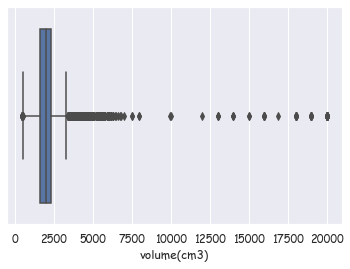

In [10]:
sns.set_context('notebook')
sns.boxplot(x=df['volume(cm3)'])

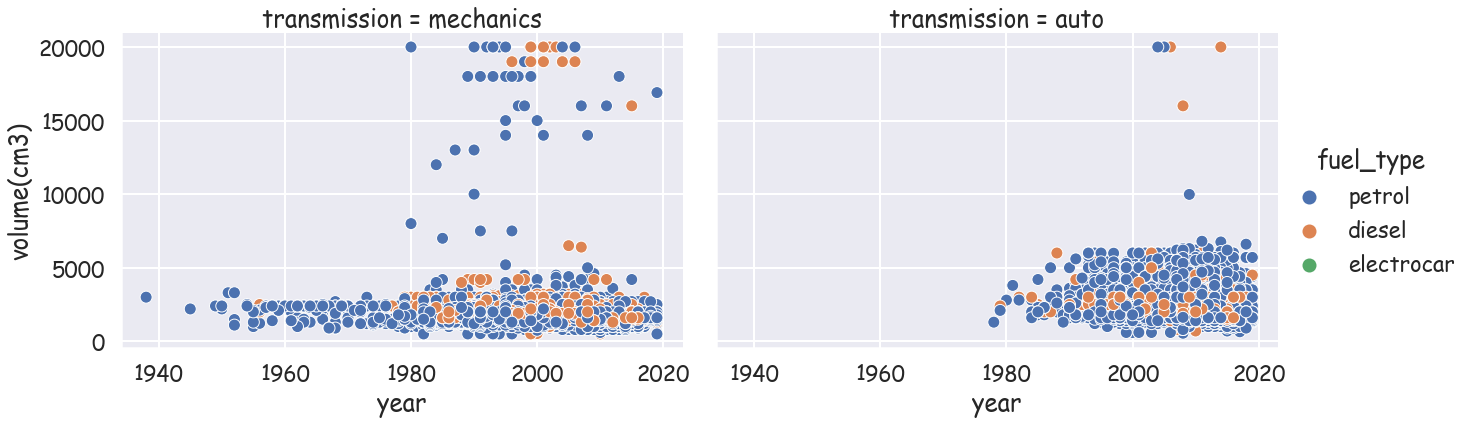

In [11]:
sns.set_context('poster')
sns.relplot(data=df,x='year',y='volume(cm3)',kind='scatter',height=6,aspect=1.5,hue='fuel_type',col='transmission')

In [12]:
c = df[df['volume(cm3)'] >= 7000].sort_values(by='volume(cm3)',ascending=True)
# c

In [13]:
new_df = df.drop(c.index)
for a, b in zip(c.iloc[:, 0], c.iloc[:, 1]):
    f = new_df[(new_df['make']==a) & (new_df['model']==b)]
    c.loc[(c['make']==a) & (c['model']==b), 'volume(cm3)'] = f['volume(cm3)'].median()
df = pd.concat([new_df,c],ignore_index=True)

In [14]:
df.shape

(40000, 12)

In [15]:
df[df['volume(cm3)'] >= 7000].sort_values(by='volume(cm3)',ascending=True)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment


<br>

<br>

# DATA VISUALISATIONS <a class="anchor" id="visual"></a>

### Car companies. Their  Models and Mean Selling Price <a class="anchor" id="v1"></a>

In [27]:
df1 = df.groupby(['make','model'])[['volume(cm3)','priceUSD']].agg([np.mean]).sort_values(['make',('volume(cm3)','mean')],ascending=[True,False])
df1

volume(cm3)       priceUSD
                                               mean           mean
make           model                                              
acura          zdx                      3700.000000   17837.666667
               mdx                      3590.909091   12168.636364
               rl                       3500.000000    7623.000000
               tl                       3320.000000    9612.200000
               legend                   3200.000000    2999.000000
               tlx                      2400.000000   18000.000000
               tsx                      2400.000000   10699.888889
               rdx                      2300.000000   14137.500000
               ilx                      2000.000000   15900.000000
               rsx                      2000.000000    6300.000000
alfa-romeo     164                      2333.333333     966.666667
               166                      2246.428571    3054.500000
               159                      2187.500000    8081.250000
               75                       2000.000000    1711.000000
               gtv                      2000.000000    4700.000000
               156                      1927.777778    2087.902778
               gt                       1900.000000    6000.000000
               147                      1660.000000    3327.062500
               145                      1621.000000    1158.600000
               146                      1566.666667    1131.875000
               giulietta                1400.000000   10000.000000
aro            24                       2400.000000    3000.000000
aston-martin   dbs                      5900.000000   95000.000000
audi           s8                       4545.454545   11190.909091
               rs6                      4275.000000   12100.000000
               rs5                      4200.000000   28000.000000
               rs7                      4000.000000   59900.000000
               s7                       4000.000000   55000.000000
               s6                       3886.285714   11114.285714
               s5                       3720.000000   18200.000000
               a8                       3626.390863   11129.187817
               v8                       3588.750000    3600.000000
               q7                       3491.325203   20297.032520
               q8                       2995.000000   92369.000000
               a6-allroad               2970.212766   10809.446809
               a7                       2956.521739   23923.826087
               s4                       2864.400000    9220.000000
               rs3                      2500.000000   36500.000000
               a6                       2442.705357    8294.908482
               90                       2293.333333    2186.666667
               coupe                    2228.500000    3217.500000
               q5                       2162.129032   19164.720430
               200                      2157.142857    1707.142857
               100                      2146.034483    1650.150246
               a5                       2137.500000   14606.333333
               tt                       2060.000000   11150.000000
               a4-allroad               2000.000000   14484.500000
               q3                       2000.000000   16709.720000
               tts                      2000.000000   14400.000000
               a4                       1962.078788    7356.131313
               80                       1852.980892    1720.757962
               a3                       1655.056180    7685.797753
               a1                       1400.000000    9796.500000
               a2                       1400.000000    5031.000000
bentley        mulsanne                 6775.000000  155070.500000
               bentayga                 6000.000000  182738.500000
               continental-flying-spur  6000.000000   26500.000000
               conti

<br>

### Popularity By Make <a class="anchor" id="v2"></a>

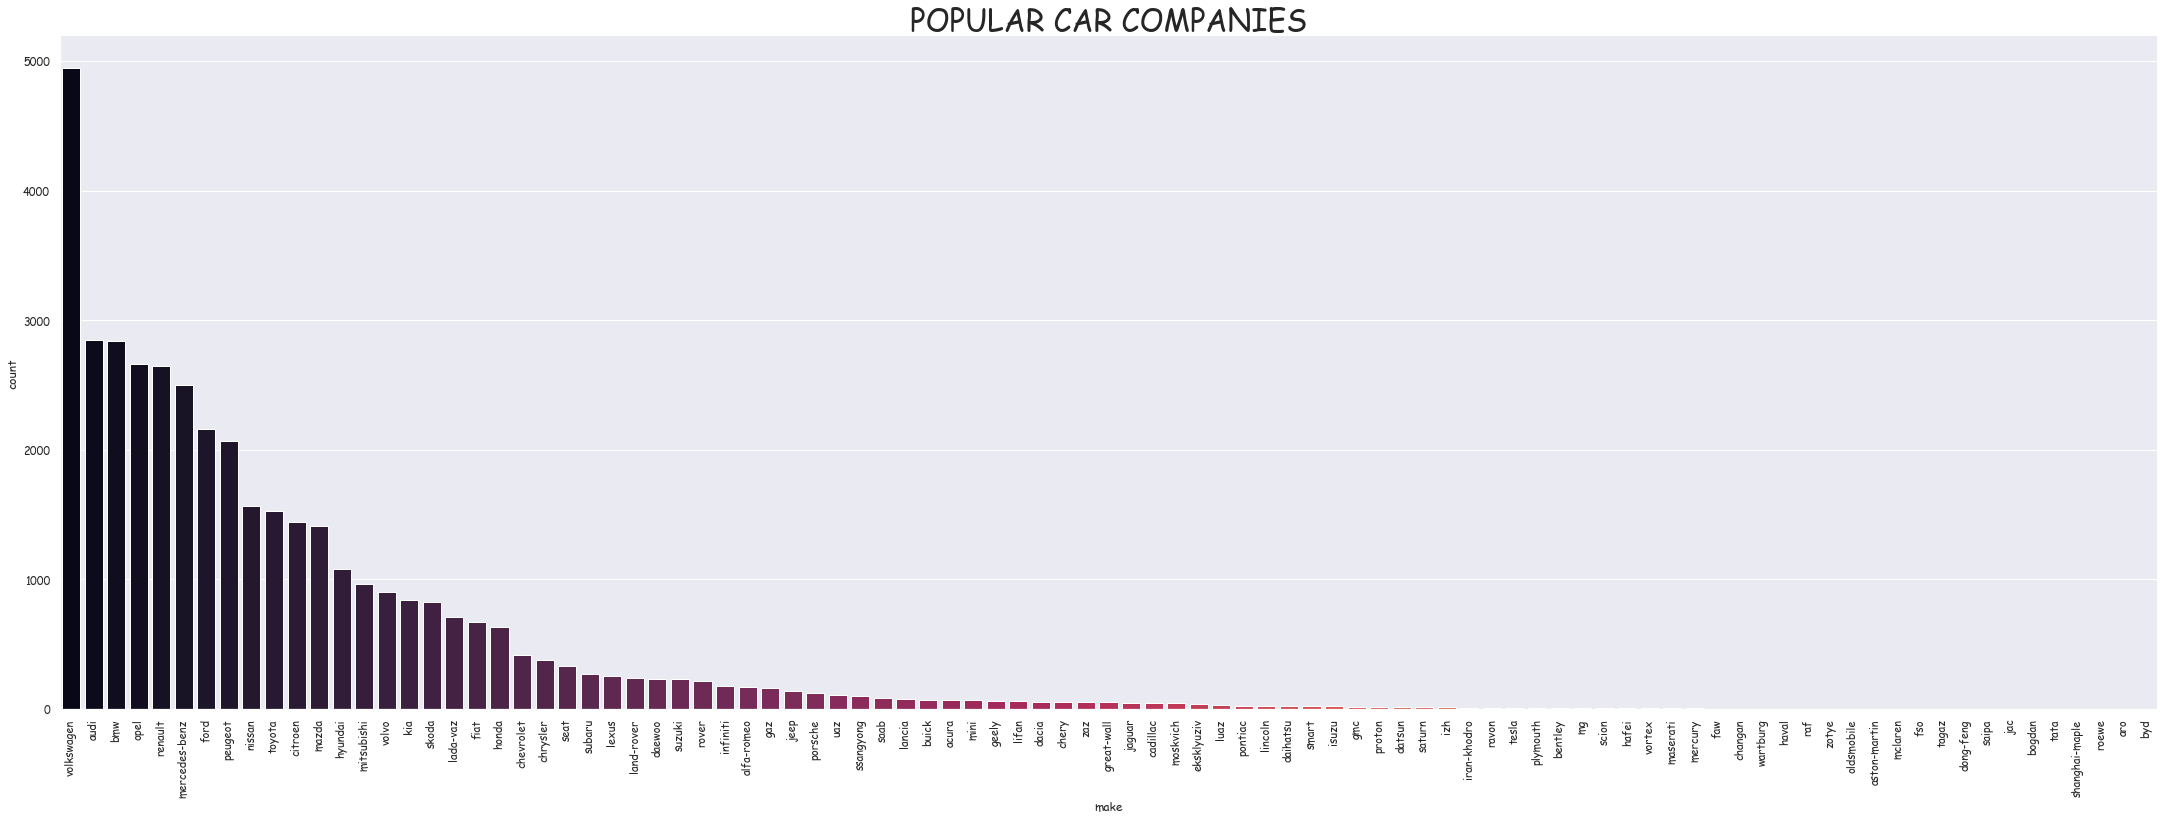

In [32]:
sns.catplot(data=df, x='make', kind="count", palette="rocket",height=10,aspect=3,order = df['make'].value_counts().index)
plt.title('POPULAR CAR COMPANIES',fontsize=30)
plt.xticks(rotation=90)
plt.show()

<br>

### Popularity By Segment<a class="anchor" id="v3"></a>

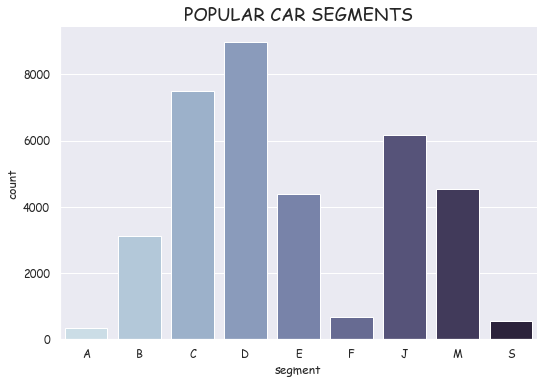

In [30]:
sns.set_context('notebook')
sns.catplot(data= df.sort_values('segment'), x='segment', kind="count", palette="ch:s=.25,rot=-.25",aspect=1.5)
plt.title('POPULAR CAR SEGMENTS',fontsize=18)
plt.show()

<br>

### Popularity By Color <a class="anchor" id="v4"></a> 

Text(0.5, 1.0, 'POPULAR CAR COLORS')

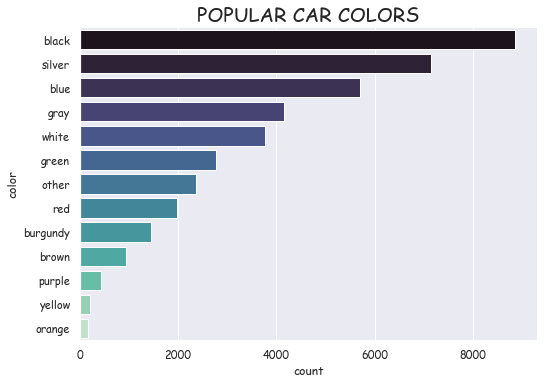

In [31]:
sns.set_context('notebook')
sns.catplot(y="color", data=df,kind='count',aspect=1.5,order=df.color.value_counts().index,palette='mako')
plt.title('POPULAR CAR COLORS',fontsize=20)

<br>

### Popularity By Segment in each Make<a class="anchor" id="v5"></a>

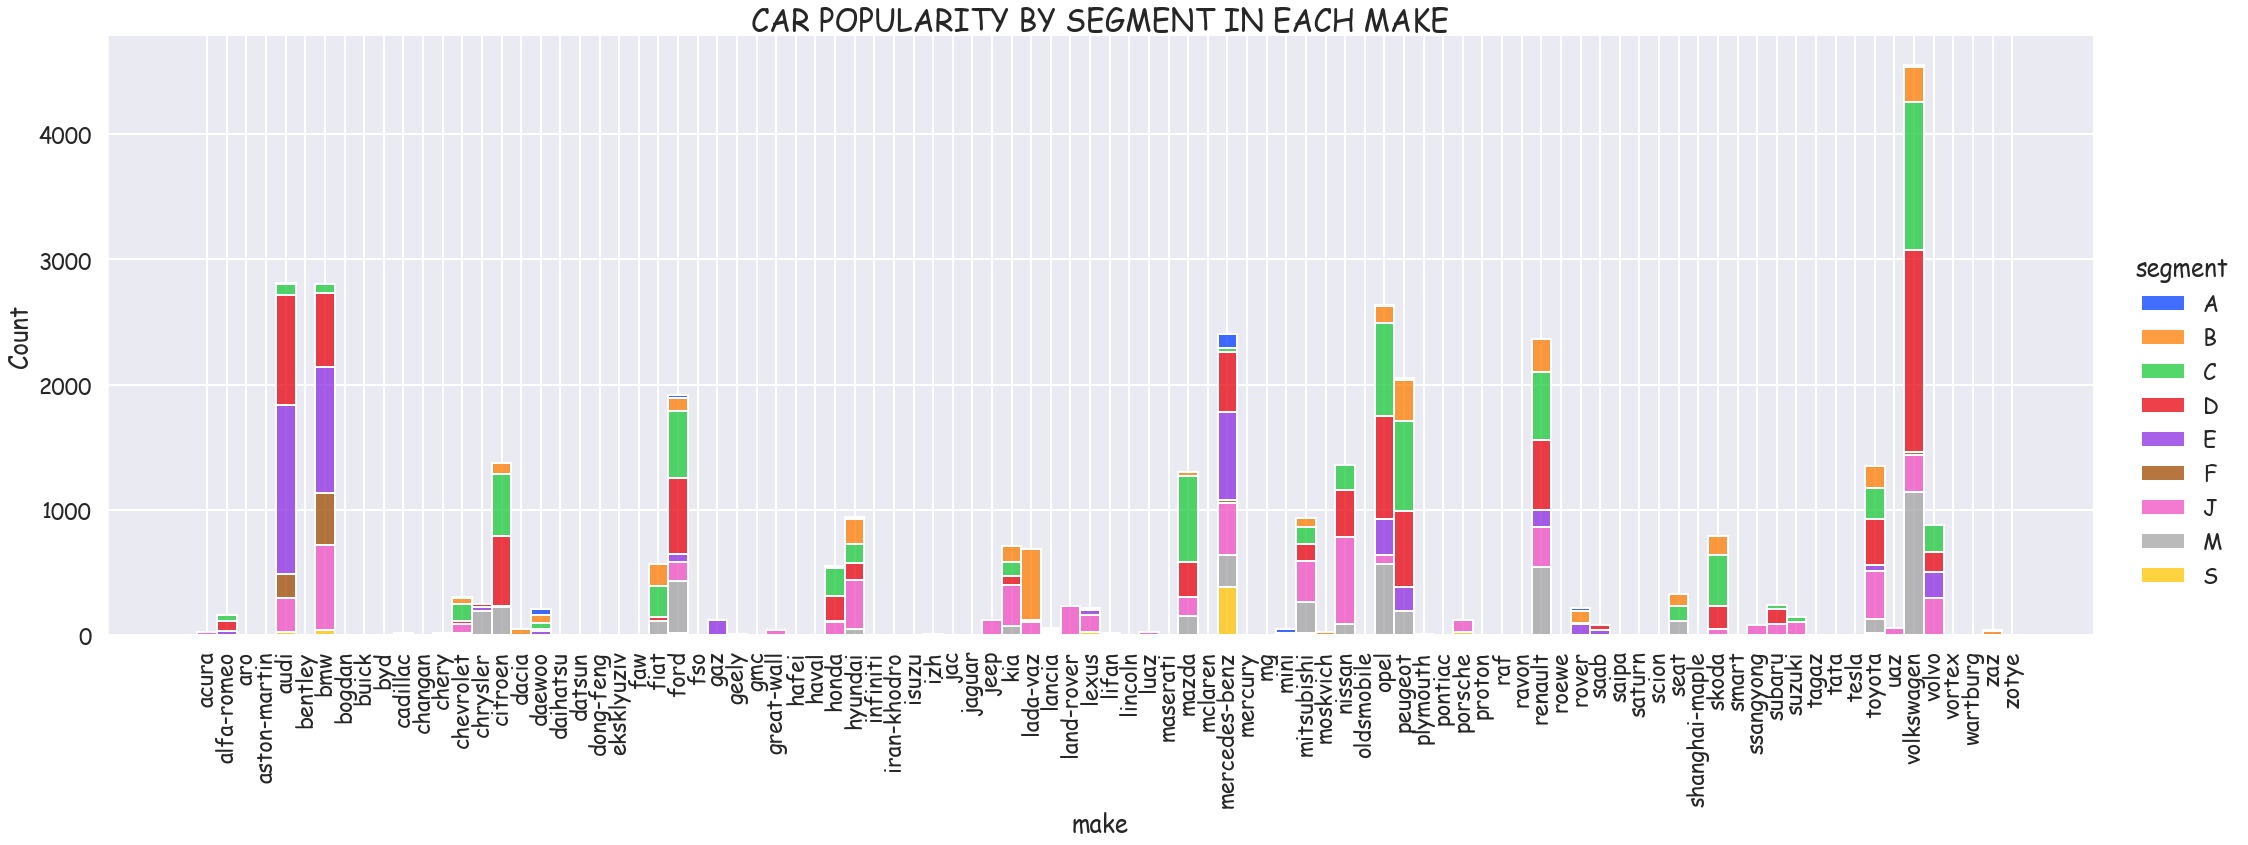

In [20]:
sns.set_context('poster')
sns.displot(df.sort_values('make'), x="make", hue="segment",hue_order= ['A','B','C','D','E','F','J','M','S'], multiple="stack",height=10,aspect=3,palette='bright')
plt.title('CAR POPULARITY BY SEGMENT IN EACH MAKE',fontsize=30)
plt.xticks(rotation=90)
plt.show()

<br>

### Popularity By Fuel Type in each Make<a class="anchor" id="v6"></a>

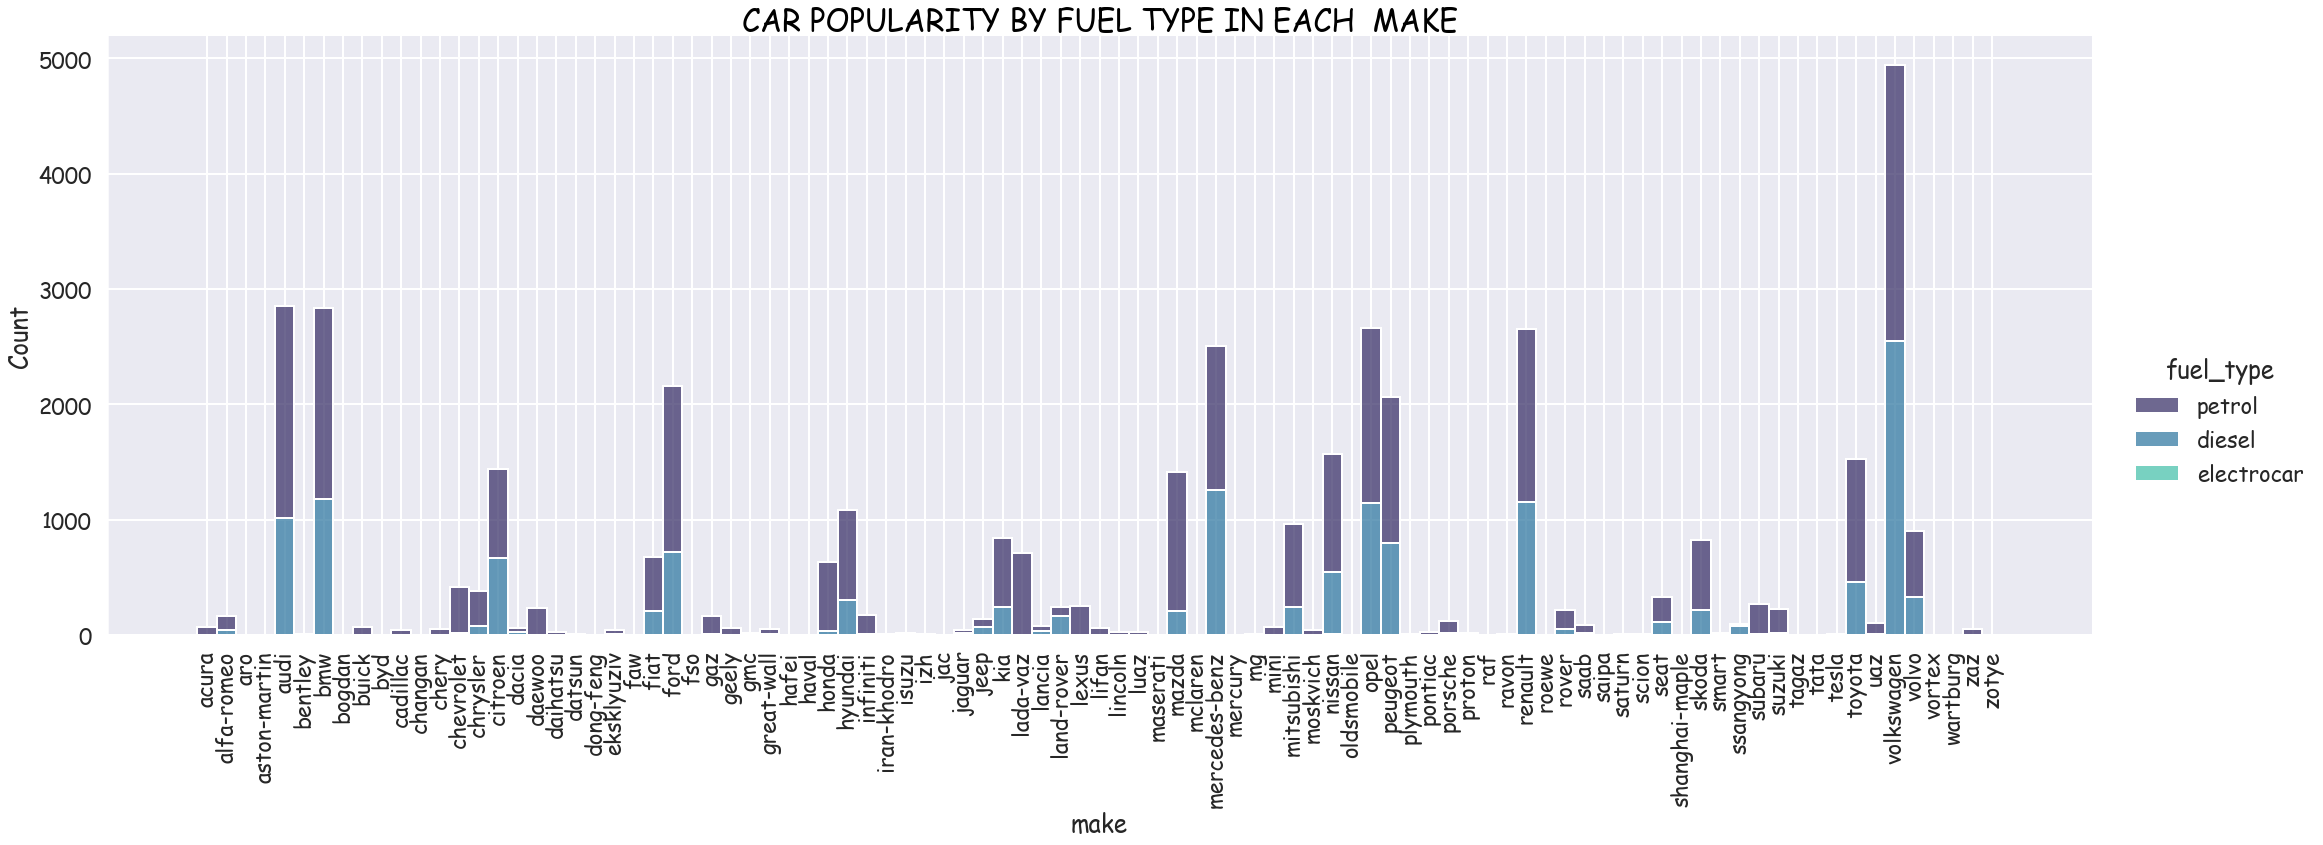

In [21]:
sns.displot(df.sort_values('make'), x="make", hue="fuel_type", multiple="stack",height=10,aspect=3,palette='mako')
plt.title('CAR POPULARITY BY FUEL TYPE IN EACH  MAKE',color='black',fontsize=30,fontweight=5)
plt.xticks(rotation=90)
plt.show()

<br>

###  Selling Price Variation<a class="anchor" id="v7"></a>

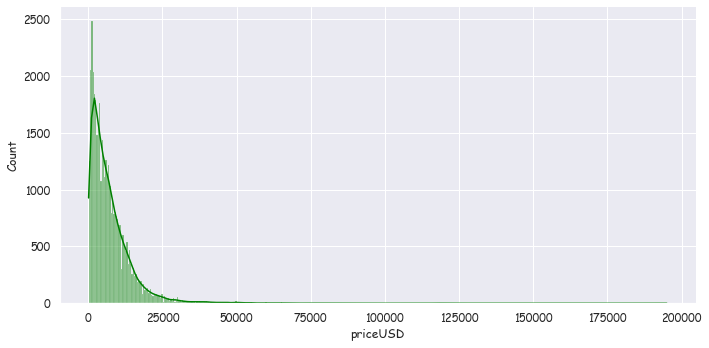

In [22]:
sns.set_context('notebook')
sns.displot(df,x='priceUSD',aspect=2,kind='hist',kde=True,color='green')

<br>

### Price Range of Each Make<a class="anchor" id="v8"></a>

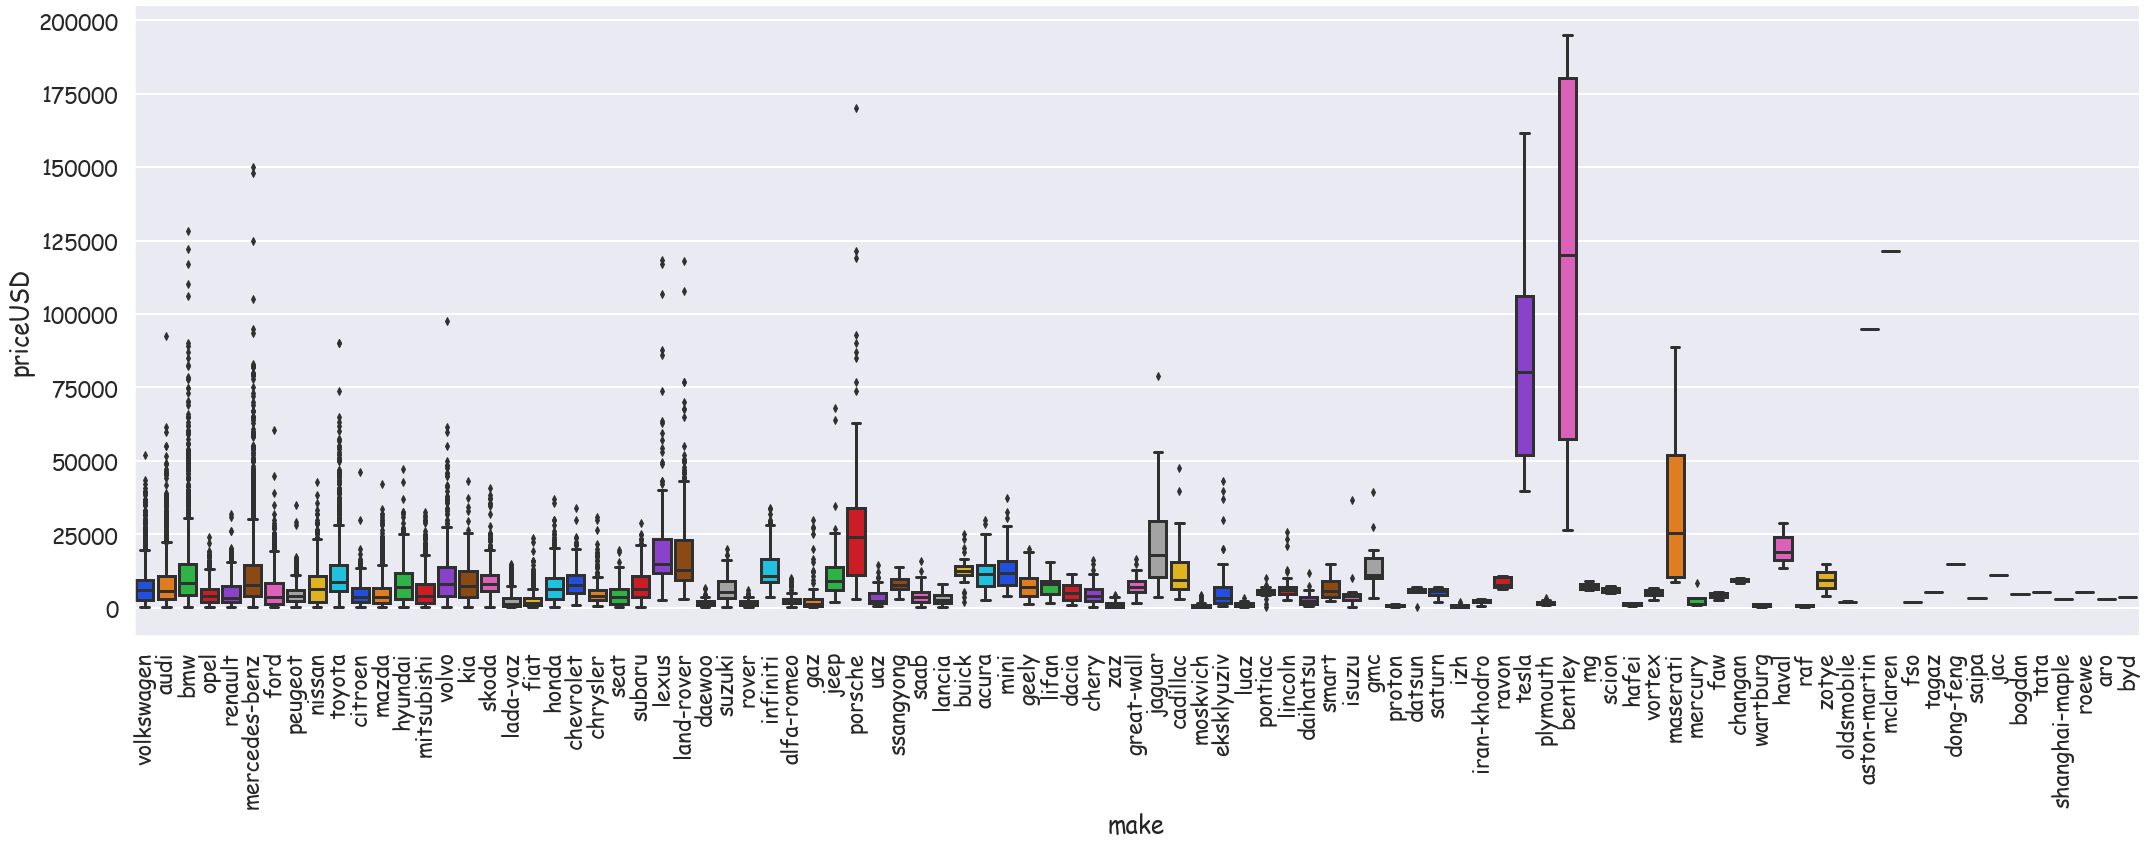

In [23]:
sns.set_context('poster')
sns.catplot(data=df,x='make',y='priceUSD',height=10,aspect=3,kind='box',order = df['make'].value_counts().index,palette='bright')
plt.xticks(rotation=90)
plt.show()

<br>

### Price Range of Each Segment<a class="anchor" id="v9"></a>

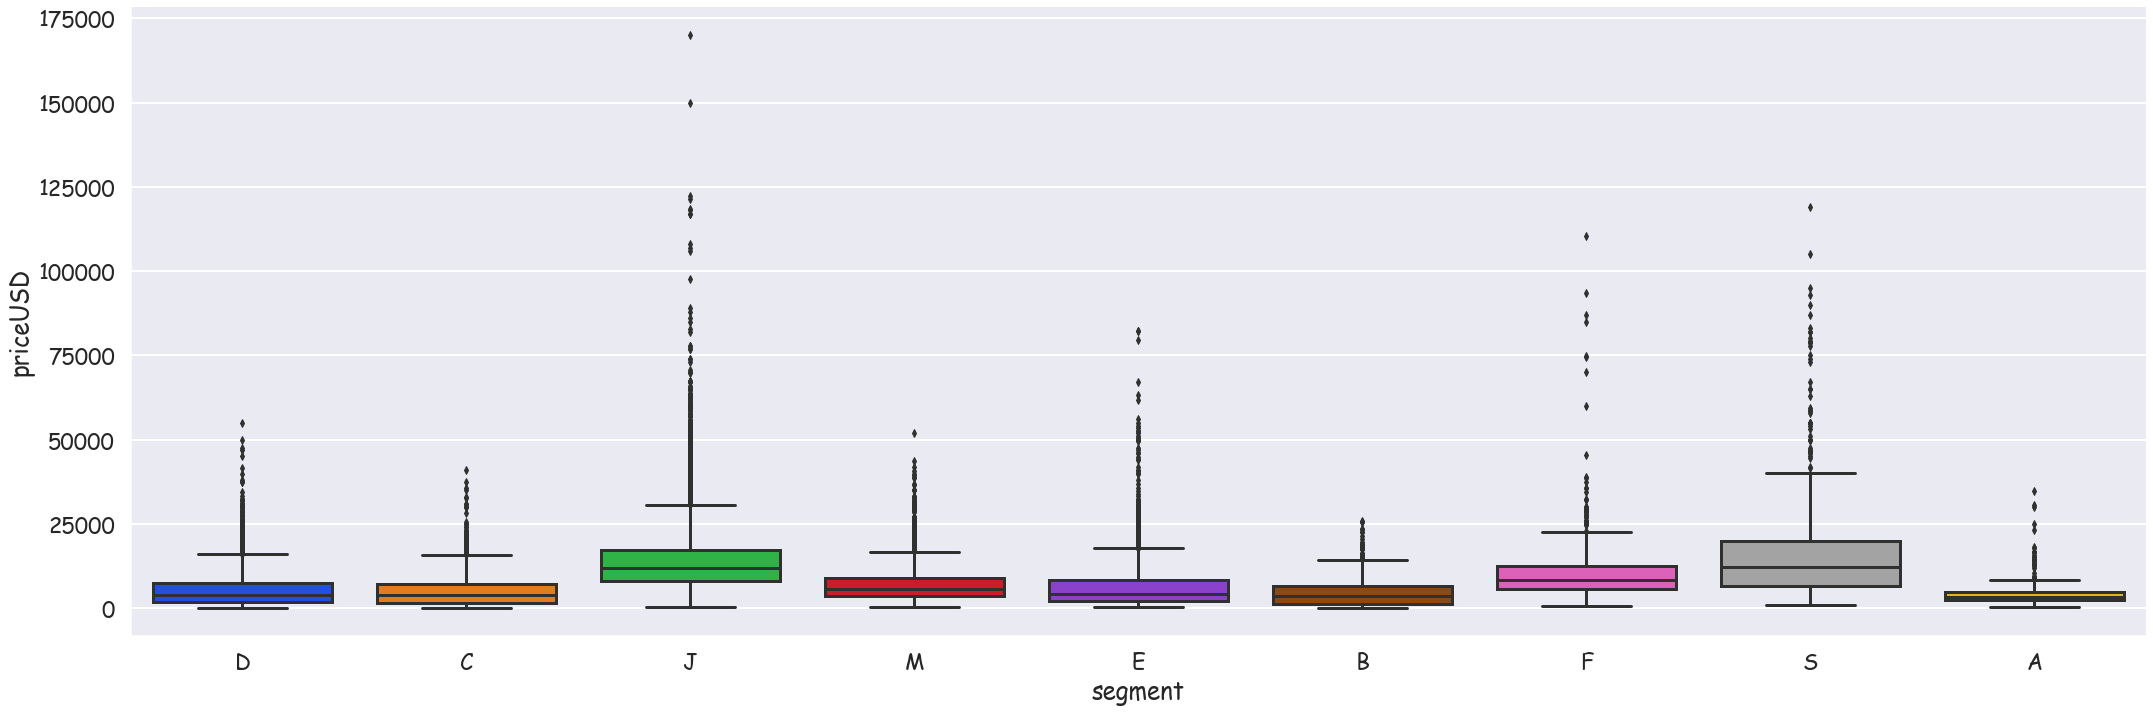

In [24]:
sns.catplot(data=df,x='segment',y='priceUSD',height=10,aspect=3,kind='box',order = df['segment'].value_counts().index,palette='bright')
plt.show()

<br>

### Year  vs  Price(USD)<a class="anchor" id="v10"></a>

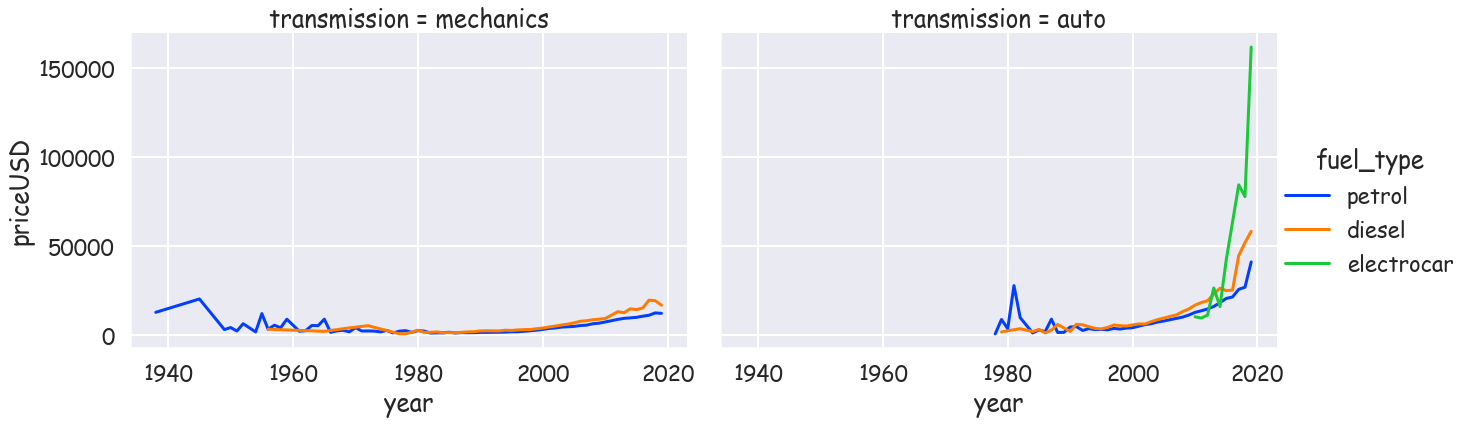

In [25]:
sns.relplot(data=df,x='year',y='priceUSD',kind='line',height=6,aspect=1.5,ci=None,col='transmission',hue='fuel_type',palette='bright')

<br>

### Price VS Car Distance travelled<a class="anchor" id="v11"></a> 

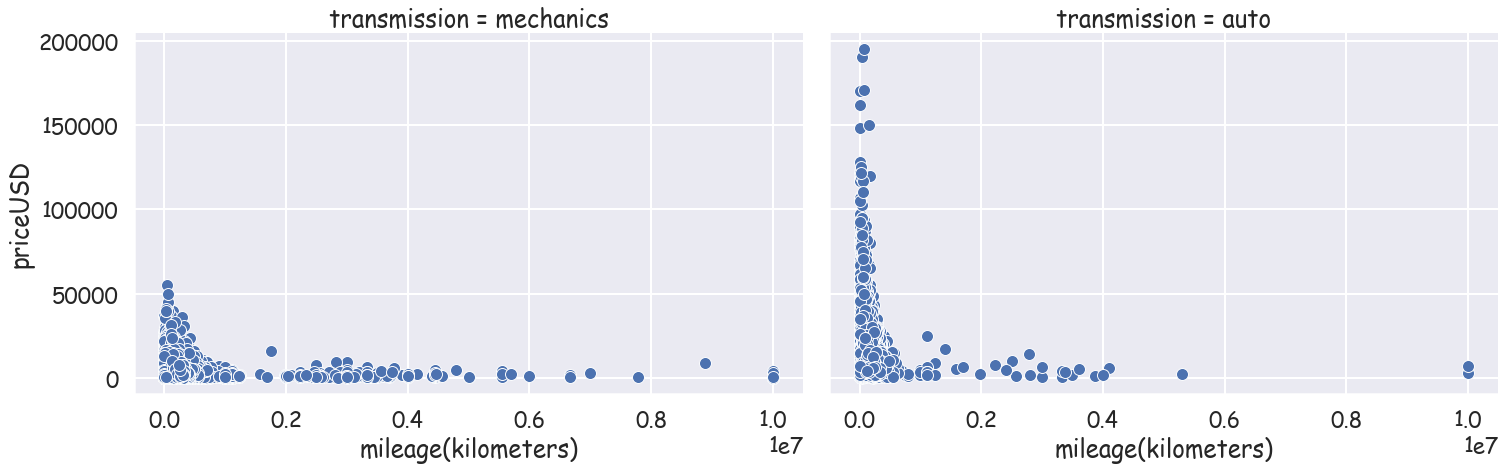

In [26]:
sns.relplot(data=df,x='mileage(kilometers)',y='priceUSD',height=7,aspect=1.5,col='transmission')